# Tutorial on MEEP simulation run with phcr-cavity.py
The tutorial is based on __[documentation example](https://meep.readthedocs.io/en/latest/Python_Tutorials/Resonant_Modes_and_Transmission_in_a_Waveguide_Cavity/)__. 

To run the simulation we have to address the python translator by running system command with <b>!</b> symbol. 

We run simulation code <b>phcr-cavity.py</b>

The console output is saved at <b>Output.txt</b>

In [3]:
import meep as mp
from meep import mpb
import math as mt
import numpy as np
from scipy.special import j1
from subprocess import call
import matplotlib.pyplot as plt

resolution = 20  # pixels/a

wavelength = 1.550e-6   # resonant wavelength
a = 0.720e-6        # units of m
h = 0.220e-6         # units of m
w = 2.300e-6         # units of m

g = 2*np.pi/a       # reciprocal lattice vector

c = 3e8

nSi3N4 = 1.996
epsSi3N4 = nSi3N4**2
nAir = 1
epsAir = nAir**2

N = 10
Nd = np.linspace(1, N, N) # number of tapering profile of PC nanobeam
ff = np.zeros(N)  # ff of PC nanobeam
ffstart = 0.1765 # at f_res
ffend = 0.1373 # at gamma_max

R = np.zeros(N, float)

for j in range(N):
    ff[j] = ffstart - (Nd[j] - 1)**2/(N - 1)**2*(ffstart - ffend) # perturbed lattice constants for a defect
    R[j] = np.sqrt(ff[j]*a*w/np.pi) # units of "a" 

# num_k = 7

# f = np.genfromtxt("modes_N_h_10_k_05.dat", delimiter=",")

# omega_air = f[:,2]*g*c
# omega_diel = f[:,1]*g*c
# k = f[:,0]    
# ###########################################################################

# fig, ax = plt.subplots()   

# ax.plot(k, omega_diel/(2*np.pi*1e12), color = 'red', label='omega_diel(k)')
# ax.plot(k, omega_air/(2*np.pi*1e12), color = 'blue', label='omega_air(k)')
# ax.set_ylabel("Frequency, v, THz", size=16)
# ax.set_xlabel("Wave number, k, a.u.", size=16)
# ax.grid()
# plt.legend()
# plt.show()

# v_THz = 0.323647*g*c/(2*np.pi*1e12)
# lambda_v = c/(v_THz*1e12)
# # print("v_THz = ", v_THz, "lambda = ", lambda_v)

# print("omega_diel (THz) =", omega_diel/(2*np.pi*1e12), '\n' 
#       "omega_air (THz) =", omega_air/(2*np.pi*1e12) )

print("ff = ", ff, '\n'
     "R = ", R)

In [11]:
import meep as mp
from meep import mpb
import math as mt
import numpy as np

resolution = 20  # pixels/a

wavelength = 1.550e-6   # resonant wavelength
a = 0.600e-6        # units of m
# r = 0.316e-6         # units of m r = r_res = 0.316-6
h = 0.220e-6         # units of m
w = 2.300e-6         # units of m

g = 2*np.pi/a       # reciprocal lattice vector

c = 3e8

nSi3N4 = 1.996
epsSi3N4 = nSi3N4**2
nAir = 1
epsAir = nAir**2

N = 50
ffmax = 0.25 # ffmax = ff_res = 0.265(at r_res = 0.316e-6)
ff = np.linspace(0.01, ffmax, N)

print("ff=", ff[26])

gamma =  [0.         0.         0.         0.         0.         0.
 0.         0.02463636 0.04127587 0.05075172 0.05704457 0.06110377
 0.06365273 0.06467026 0.06429273 0.06256653 0.05965586 0.05508575
 0.048475   0.03852385 0.02179846 0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
ff =  [0.01       0.02344828 0.03689655 0.05034483 0.0637931  0.07724138
 0.09068966 0.10413793 0.11758621 0.13103448 0.14448276 0.15793103
 0.17137931 0.18482759 0.19827586 0.21172414 0.22517241 0.23862069
 0.25206897 0.26551724 0.27896552 0.29241379 0.30586207 0.31931034
 0.33275862 0.3462069  0.35965517 0.37310345 0.38655172 0.4       ]


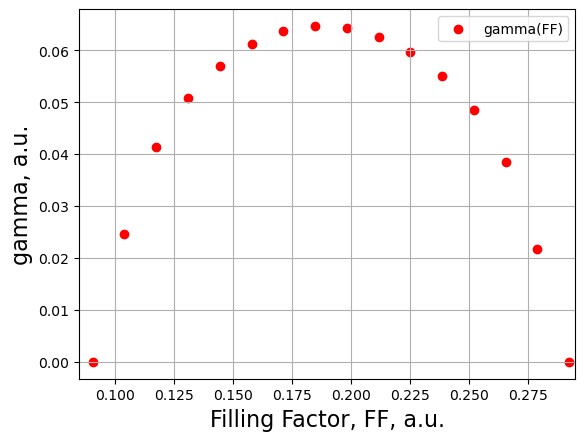

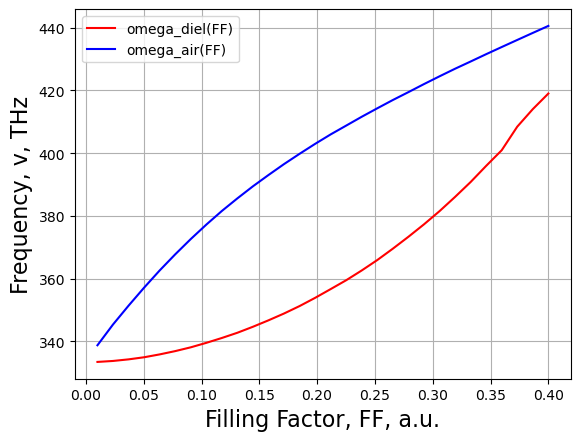

omega_diel: [333.392 333.7   334.207 334.879 335.79  336.84  338.05  339.478 341.028
 342.698 344.611 346.665 348.838 351.213 353.834 356.63  359.462 362.582
 365.904 369.53  373.321 377.284 381.493 386.038 390.784 395.941 400.929
 408.451 414.046 419.016]
419.46899999999994
373.321 0.2789655172413793
0.06467025962606347 0.06467025962606347 0.18482758620689657
R_start: 1.264260525667674e-07
R_end: 1.0290695130672932e-07


In [91]:
import meep as mp
from meep import mpb
import math as mt
import numpy as np
from scipy.special import j1
from subprocess import call
import matplotlib.pyplot as plt


resolution = 20  # pixels/a

wavelength = 1.550e-6   # resonant wavelength
a = 0.300e-6        # units of m
# r = 0.316e-6         # units of m r = r_res = 0.316-6
h = 0.220e-6         # units of m
w = 0.600e-6         # units of m

g = 2*np.pi/a       # reciprocal lattice vector

c = 3e8

# fillin_factor = np.pi*r**2/(a*w)

nSi3N4 = 1.996
epsSi3N4 = nSi3N4**2
nAir = 1
epsAir = nAir**2

N = 30
ffmax = 0.40 # ffmax = ff_res = 0.265(at r_res = 0.316e-6)
ff = np.linspace(0.01, ffmax, N)

# print("ff = ", ff, '\n' "ff[9] = ", ff[9])

num_k = 5

###########################################################################

R = np.zeros(N, float)
omega_res = np.zeros(N, float)
kappa_0 = np.zeros(N, float)
kappa_1 = np.zeros(N, float)

# omega_res = 195.48 THz
 
f = np.genfromtxt("modes_FF_30_7_16_k_05.dat", delimiter=",")

# The dependence of gamma(j)
# omega_r = 2*np.pi*195.4725*1e12 
omega_r = 2*np.pi*375*1e12 
omega_air = f[:,2]*g*c
omega_diel = f[:,1]*g*c
omega_0 = omega_diel + (omega_air - omega_diel)/2
gamma = np.sqrt( (omega_air - omega_diel)**2/(omega_air + omega_diel)**2 - (omega_r - omega_0)**2/omega_0**2 + 0j)
    
# print("omega = ", omega, '\n' "delta = ", delta, '\n' "gamma = ", abs(gamma))
print("gamma = ", gamma.real)
print("ff = ", ff)

###########################################################################

fig, ax = plt.subplots()   

ax.scatter(ff, gamma.real, color = 'red', label='gamma(FF)')
ax.set_ylabel("gamma, a.u.", size=16)
ax.set_xlabel("Filling Factor, FF, a.u.", size=16)
ax.grid()
plt.xlim(0.085,0.295)
plt.legend()
plt.show()

fig, ax = plt.subplots()   

ax.plot(ff, omega_diel/(2*np.pi*1e12), color = 'red', label='omega_diel(FF)')
ax.plot(ff, omega_air/(2*np.pi*1e12), color = 'blue', label='omega_air(FF)')
ax.set_ylabel("Frequency, v, THz", size=16)
ax.set_xlabel("Filling Factor, FF, a.u.", size=16)
ax.grid()
plt.legend()
plt.show()


# Picture 1:
# print('omega_diel:', omega_diel/(2*np.pi*1e12))
# print(omega_air[22]/(2*np.pi*1e12))
# print(omega_diel[22]/(2*np.pi*1e12), ff[22])
# print(max(gamma.real), gamma.real[10], ff[10])

# Picture 2:
# print('omega_diel:', omega_diel/(2*np.pi*1e12))
# print(omega_air[19]/(2*np.pi*1e12))
# print(omega_diel[19]/(2*np.pi*1e12), ff[19])
# print(max(gamma.real), gamma.real[10], ff[10])

# Picture 3:
# print('omega_diel:', omega_diel/(2*np.pi*1e12))
# print(omega_air[10]/(2*np.pi*1e12))
# print(omega_diel[10]/(2*np.pi*1e12), ff[10])
# print(max(gamma.real), gamma.real[5], ff[5])

# Picture 4:
print('omega_diel:', omega_diel/(2*np.pi*1e12))
print(omega_air[20]/(2*np.pi*1e12))
print(omega_diel[20]/(2*np.pi*1e12), ff[20])
print(max(gamma.real), gamma.real[13], ff[13])

###########################################################################

R = np.sqrt(ff*a*w/np.pi)

# Picture 1:
# print('R_start:', R[22])
# print('R_end:', R[10])

# Picture 2:
# print('R_start:', R[19])
# print('R_end:', R[10])

# Picture 3:
# print('R_start:', R[10])
# print('R_end:', R[5])

# Picture 4:
print('R_start:', R[20])
print('R_end:', R[13])


# print("R_res[26] =", R_res[26])
# print("Frequency(THz) =", omega_res/(2*np.pi*1e12))
# print("ff_res =", ff_res, '\n' "Frequency_res(THZ) =", Frequency_res/1e12, '\n' "Lambda_res(m) =", Lambda_res)

###########################################################################

# v_THz = 0.323647*g*c/(2*np.pi*1e12)
# lambda_v = c/(v_THz*1e12)
# print("v_THz = ", v_THz, "lambda = ", lambda_v)

gamma =  [0.00043018 0.00088117 0.0015716  0.00233744 0.00311219 0.00391329
 0.0045821  0.00529611 0.00600833 0.00671652 0.00742365 0.0081101
 0.00872303 0.00927318 0.00980024 0.01026328 0.0106644  0.01099723
 0.01129709 0.01152432]
J= [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


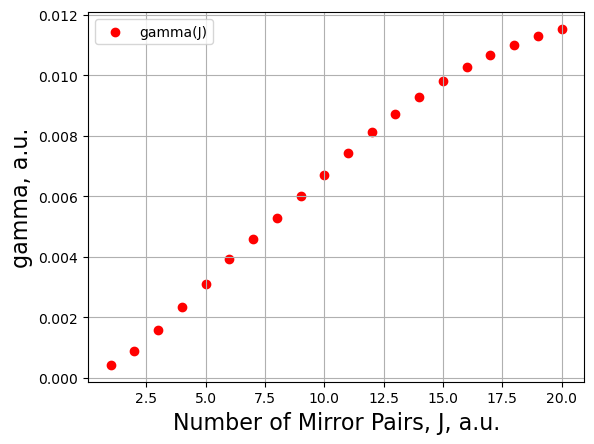

In [4]:
import meep as mp
from meep import mpb
import math as mt
import numpy as np
from scipy.special import j1
from subprocess import call
import matplotlib.pyplot as plt


resolution = 20  # pixels/a

wavelength = 1.550e-6   # resonant wavelength
a = 0.600e-6        # units of m
r = 0.316e-6         # units of m r = r_res = 0.316-6
h = 0.220e-6         # units of m
w = 2.300e-6         # units of m

g = 2*np.pi/a       # reciprocal lattice vector

c = 3e8

# fillin_factor = np.pi*r**2/(a*w)

nSi3N4 = 1.996
epsSi3N4 = nSi3N4**2
nAir = 1
epsAir = nAir**2

N = 50
ffmax = 0.25 # ffmax = ff_res = 0.265(at r_res = 0.316e-6)
ff = np.linspace(0.01, ffmax, N)

# print("ff = ", ff, '\n' "ff[9] = ", ff[9])

# num_k = 20

###########################################################################

R = np.zeros(N, float)
omega_res = np.zeros(N, float)
kappa_0 = np.zeros(N, float)
kappa_1 = np.zeros(N, float)

# omega_res = 195.48 THz
 
f = np.genfromtxt("modes_FF_N_20_k_05.dat", delimiter=",")

# The dependence of gamma(j)
omega_r = 2*np.pi*195.4725*1e12 
omega_air = f[:,2]*g*c
omega_diel = f[:,1]*g*c
omega_0 = omega_diel + (omega_air - omega_diel)/2
gamma = np.sqrt( (omega_air - omega_diel)**2/(omega_air + omega_diel)**2 - (omega_r - omega_0)**2/omega_0**2 + 0j)
    
J = np.linspace(1, len(gamma), len(gamma))

# print("omega = ", omega, '\n' "delta = ", delta, '\n' "gamma = ", abs(gamma))
print("gamma = ", gamma.real)
# print("ff = ", ff)
print("J=", J)
###########################################################################

fig, ax = plt.subplots()   

ax.scatter(J, gamma.real, color = 'red', label='gamma(J)')
ax.set_ylabel("gamma, a.u.", size=16)
ax.set_xlabel("Mirror Segment Number, J, a.u.", size=16)
ax.grid()
# plt.xlim(0.095,0.18)
plt.legend()
plt.show()

###########################################################################

# v_THz = 0.323647*g*c/(2*np.pi*1e12)
# lambda_v = c/(v_THz*1e12)
# print("v_THz = ", v_THz, "lambda = ", lambda_v)

In [3]:
a = [1, 2, 3]
print(len(a))

3


In [3]:
! grep zevenyoddfreqs: Output_disp_rel_N_h_10.txt |cut -d , -f3,7- |sed 1d > modes_N_h_10_k_05.dat

In [5]:
! grep zevenyoddfreqs: Output_disp_rel_FF_30_8_1.txt |cut -d , -f3,7- |sed 1d > modes_FF_30_8_1_k_05.dat

In [4]:
! grep i_period: Output_disp_rel_FF_30_8_1.txt > modes_FF_30_8_1_k_05.dat

In [138]:
! grep tmfreqs: Output_band_diagram_12.txt > tm_freqs_12.dat

In [139]:
! grep tefreqs: Output_band_diagram_12.txt > te_freqs_12.dat

In [ ]:
! mpirun -np 16 python PC-nanobeam-modes-FF-a.py > Output_disp_rel_FF_30_8_1.txt

In [ ]:
! mpirun -np 16 python v3_PC-nanobeam_meep-sim.py -N 20 -N_add 10 -r false -pixavg true > Output-PC-nanobeam-N-20-N_add-10-Flux-pixel-avg_2.txt

For optional parallel run on several core we use mpi.

We may execute  <b>mpirun -np 6 </b>  routine for running the code with 6 cores:

In [58]:
! rm PC-nanobeam_mpb_meep-norm-sim-ey-*.h5

In [104]:
! rm v3_PC-nanobeam_meep*.png

In [67]:
! h5topng -S 6 -x 447:479 v2_PC-nanobeam_meep-sim-eps-000000.00.h5

In [76]:
! h5topng -S 6 -y 47:56 v2_PC-nanobeam_meep-sim-eps-000000.00.h5

In [102]:
! h5topng -S 6 -z 47:56 v3_PC-nanobeam_meep-sim-eps-000000.00.h5

In [94]:
! h5topng -t 1:100 -z 52 -S2 -Zc  dkbluered -a yarg -A v3_PC-nanobeam_meep-sim-eps-000000.00.h5 v3_PC-nanobeam_meep-sim-ey-slice.h5 

h5topng error: invalid slice of HDF5 data


In [96]:
! ffmpeg -y  -start_number 01 -i v3_PC-nanobeam_meep-sim-ey-slice.t%03d.png -r 10 -pix_fmt yuv420p -c:a libvo_aacenc -vcodec libx264 video-normal-ph-cav.mp4 > video_out-PC-nanobeam.txt

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


In [103]:
from ipywidgets import Video, Image
video = Video.from_file("video-normal-ph-cav.mp4",play=True)
video

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x03\x15\x7fmdat\x0…

In [101]:
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt

# simfileName_n ='Output-norm-ph-cav-flux-pixel-avg.txt'
# fileName_n = 'flux-norm-ph-cav-pixel-avg.dat'

simfileName_d ='Output-PC-nanobeam-N-20-N_add-10-Flux-pixel-avg.txt'
fileName_d = 'flux-defect-ph-nanobeam-pixel-avg.dat'

# ex_str_n =f'grep flux1: {simfileName_n}  | cut -d , -f2,3- | sed 1d > {fileName_n}'
ex_str_d =f'grep flux1: {simfileName_d}  | cut -d , -f2,3- | sed 1d > {fileName_d}'

# call(ex_str_n, shell="True")
call(ex_str_d, shell="True")

# f_n = np.genfromtxt(fileName_n, delimiter=",")
f_d = np.genfromtxt(fileName_d, delimiter=",")

#print(f)

#g = np.genfromtxt("flux-nh.dat", delimiter=",")

# nzd_f = f_d[:,1]/f_n[:,1] # Normalized flux

# fig, ax = plt.subplots()
# ax.plot(1/f_n[:,0],f_n[:,1], 'b-', label='For normal PC structure')
# plt.xlabel("Wavelength, um")
# plt.ylabel("Transmission, a.u.")
# plt.legend()
# plt.show()

fig, ax = plt.subplots()
ax.plot(1/f_d[:,0],f_d[:,1], 'r-', label='For defect PC structure')
plt.xlabel("Wavelength, um")
plt.ylabel("Transmission, a.u.")
plt.legend()
plt.show()

# fig, ax = plt.subplots()
# ax.plot(1/f_d[:,0],nzd_f/max(nzd_f), 'c-', label='Normalized flux')
# plt.xlabel("Wavelength, um")
# plt.ylabel("Transmission, a.u.")
# #plt.xlim(left=0.88, right=0.94)
# plt.legend()
# plt.show()

In [92]:
a_min = 0.300e-6        # units of m
a_max = 0.800e-6        # units of m
a = np.linspace(a_min, a_max, 11)

print(a)

In [6]:
rm modes_FF_30_8_1_k_05.dat
